<a href="https://colab.research.google.com/github/AlbertoMartinezS/idal_ia3/blob/main/ProyectoBBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
COLAB = True

In [3]:
if COLAB:
    #%tensorflow_version 1.x
    !pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [4]:
from keras.models import Sequential, load_model, Model
from keras.layers import (Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation,
                          BatchNormalization, GlobalAveragePooling2D)
from keras import backend as K
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

from IPython.display import SVG, clear_output
from keras.utils.vis_utils import model_to_dot

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, roc_curve, auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

%matplotlib inline

In [5]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import SVG, display, clear_output
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

In [6]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1CwEH63W3VtCYbkurBhg9TUqdotTmP4UD',
                                        dest_path='./train.zip', unzip=True)
    gdd.download_file_from_google_drive(file_id='1lUwj3LhiU1mOTb0ic-UjZMcR65KusovF',
                                        dest_path='./test.zip', unzip=True)
    


Unzipping...Done.
Unzipping...Done.


In [7]:
!ls

sample_data  test  test.zip  train  train.zip


In [8]:
!ls train/bio

bio0000_frame0000001.jpg  bio0002_frame0000561.xml  bio0014_frame0000127.txt
bio0000_frame0000001.txt  bio0002_frame0000564.jpg  bio0014_frame0000127.xml
bio0000_frame0000001.xml  bio0002_frame0000564.txt  bio0014_frame0000137.jpg
bio0000_frame0000002.jpg  bio0002_frame0000564.xml  bio0014_frame0000137.txt
bio0000_frame0000002.txt  bio0002_frame0000567.jpg  bio0014_frame0000137.xml
bio0000_frame0000002.xml  bio0002_frame0000567.txt  bio0014_frame0000143.jpg
bio0000_frame0000004.jpg  bio0002_frame0000567.xml  bio0014_frame0000143.txt
bio0000_frame0000004.txt  bio0002_frame0000570.jpg  bio0014_frame0000143.xml
bio0000_frame0000004.xml  bio0002_frame0000570.txt  bio0014_frame0000148.jpg
bio0000_frame0000006.jpg  bio0002_frame0000570.xml  bio0014_frame0000148.txt
bio0000_frame0000006.txt  bio0002_frame0000576.jpg  bio0014_frame0000148.xml
bio0000_frame0000006.xml  bio0002_frame0000576.txt  bio0014_frame0000158.jpg
bio0000_frame0000008.jpg  bio0002_frame0000576.xml  bio0014_frame0000158.txt

In [9]:
!ls train/obj/

obj0000_frame0000001.jpg  obj0340_frame0000020.jpg  obj1502_frame0000276.jpg
obj0000_frame0000001.txt  obj0340_frame0000020.txt  obj1502_frame0000276.txt
obj0000_frame0000001.xml  obj0340_frame0000020.xml  obj1502_frame0000276.xml
obj0000_frame0000002.jpg  obj0340_frame0000021.jpg  obj1502_frame0000278.jpg
obj0000_frame0000002.txt  obj0340_frame0000021.txt  obj1502_frame0000278.txt
obj0000_frame0000002.xml  obj0340_frame0000021.xml  obj1502_frame0000278.xml
obj0000_frame0000003.jpg  obj0340_frame0000022.jpg  obj1502_frame0000279.jpg
obj0000_frame0000003.txt  obj0340_frame0000022.txt  obj1502_frame0000279.txt
obj0000_frame0000003.xml  obj0340_frame0000022.xml  obj1502_frame0000279.xml
obj0000_frame0000006.jpg  obj0340_frame0000023.jpg  obj1502_frame0000281.jpg
obj0000_frame0000006.txt  obj0340_frame0000023.txt  obj1502_frame0000281.txt
obj0000_frame0000006.xml  obj0340_frame0000023.xml  obj1502_frame0000281.xml
obj0000_frame0000007.jpg  obj0340_frame0000025.jpg  obj1502_frame0000283.jpg

In [10]:
ficheros = glob("./train/obj/*")
ficheros[0]

'./train/obj/obj0301_frame0000041.jpg'

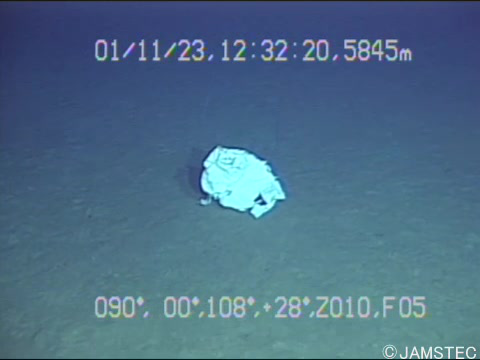

In [11]:
imagen = load_img(ficheros[0])
imagen

In [12]:
aux1 = "./train/bio/*"
aux2 = "./train/obj/*"

ficheros_train_BIO    = glob(aux1)
ficheros_train_OBJETO = glob(aux2)
ficheros_trainval = ficheros_train_BIO + ficheros_train_OBJETO
y_trainval = len(ficheros_train_BIO)*["bio"] + len(ficheros_train_OBJETO)*["obj"]

aux1 = "./train/bio/*"
aux2 = "./train/obj/*"
ficheros_test_BIO    = glob(aux1)
ficheros_test_OBJETO = glob(aux2)
ficheros_test = ficheros_test_BIO + ficheros_test_OBJETO
y_test = len(ficheros_test_BIO)*["bio"] + len(ficheros_test_OBJETO)*["obj"]

In [13]:
df_trainval = pd.DataFrame({"filepath":ficheros_trainval, "class":y_trainval})
df_test     = pd.DataFrame({"filepath":ficheros_test, "class":y_test})
df_trainval

,filepath,class
0,./train/bio/bio0015_frame0000296.jpg,bio
1,./train/bio/bio0002_frame0000603.xml,bio
2,./train/bio/bio0000_frame0000171.jpg,bio
3,./train/bio/bio0001_frame0000474.xml,bio
4,./train/bio/bio0000_frame0000110.jpg,bio
...,...,...
17155,./train/obj/obj1658_frame0001474.xml,obj
17156,./train/obj/obj0332_frame0000048.xml,obj
17157,./train/obj/obj0221_frame0000042.jpg,obj
17158,./train/obj/obj0348_frame0000160.txt,obj


In [14]:
df_test

,filepath,class
0,./train/bio/bio0015_frame0000296.jpg,bio
1,./train/bio/bio0002_frame0000603.xml,bio
2,./train/bio/bio0000_frame0000171.jpg,bio
3,./train/bio/bio0001_frame0000474.xml,bio
4,./train/bio/bio0000_frame0000110.jpg,bio
...,...,...
17155,./train/obj/obj1658_frame0001474.xml,obj
17156,./train/obj/obj0332_frame0000048.xml,obj
17157,./train/obj/obj0221_frame0000042.jpg,obj
17158,./train/obj/obj0348_frame0000160.txt,obj


In [15]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_trainval, test_size=0.2, random_state=0,
                                    stratify=df_trainval["class"])

In [24]:
len(df_train), len(df_val), len(df_test)

(13728, 3432, 17160)

(480, 360)


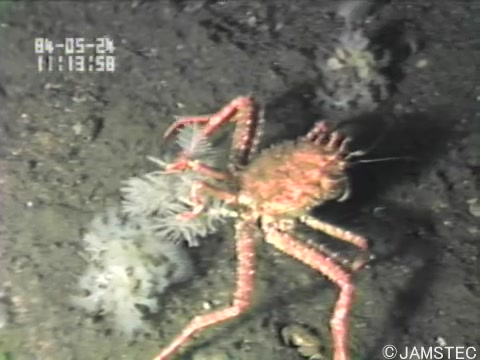

In [27]:
imagen = load_img(ficheros_trainval[2])
print(imagen.size)
imagen

In [28]:
aux = np.array(imagen)
aux.shape

(360, 480, 3)

In [29]:
def preprocesado(x):
    # cambio axis=2 por axis=-1, ya que cuando keras llame a esta función no va a introducir
    # una sola imagen sino varias, por lo que va a haber 4 índices:
    # n ejemplos x n filas en imagen x n columnas en imagen x n canales color (3)
    # el -1 indica "último índice"
    return np.expand_dims(np.mean(x, axis=-1), -1) / 255

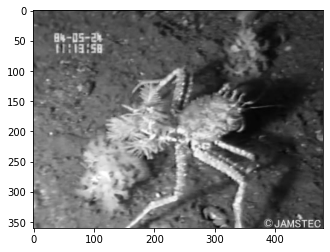

In [30]:
plt.imshow(preprocesado(aux)[:,:,0], cmap="gray");

In [31]:
df_train.iloc[3]

filepath    ./train/bio/bio0003_frame0000128.txt
class                                        bio
Name: 1962, dtype: object

filepath    ./train/bio/bio0016_frame0000107.jpg
class                                        bio
Name: 171, dtype: object


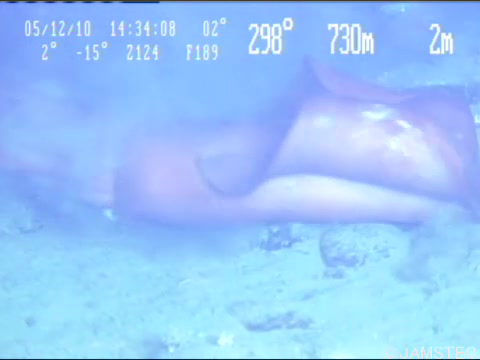

In [33]:
fich = df_train.iloc[2]["filepath"]
print(df_train.iloc[2])
imagen = load_img(fich)
display(imagen)

filepath    ./train/obj/obj0750_frame0000048.jpg
class                                        obj
Name: 9116, dtype: object


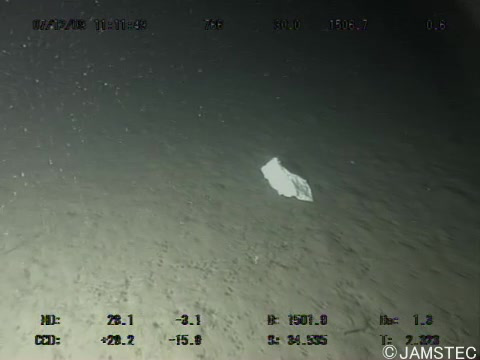

In [43]:
fich = df_train.iloc[100]["filepath"]
print(df_train.iloc[100])
imagen = load_img(fich)
display(imagen)

In [44]:
df_train["class"].value_counts() / len(df_train)

obj    0.75
bio    0.25
Name: class, dtype: float64

In [45]:
df_test["class"].value_counts() / len(df_test)

obj    0.75
bio    0.25
Name: class, dtype: float64

In [21]:
test_data_dir = 'test'

In [72]:
normed_dims = (150,150)
batch_size = 64

In [73]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function = preprocesado,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='mirror',
    shear_range=0.1,
    zoom_range=0.2)

val_datagen  = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocesado)

test_datagen = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocesado)

In [74]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical')

Found 4571 validated image filenames belonging to 2 classes.
Found 1149 validated image filenames belonging to 2 classes.
Found 5720 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 9157 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2283 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 11440 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [75]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=normed_dims+(3,)))
model.add(Conv2D(32, (5,5), activation='relu'))
                 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))
model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))
model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_regularizer="l2")) 
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 conv2d_25 (Conv2D)          (None, 142, 142, 32)      25632     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 71, 71, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 67, 67, 32)        25632     
                                                                 
 conv2d_27 (Conv2D)          (None, 63, 63, 32)        25632     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                 

In [76]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [77]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

In [78]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n
number_test_samples  = test_generator.n

number_train_samples, number_val_samples, number_test_samples

(4571, 1149, 5720)

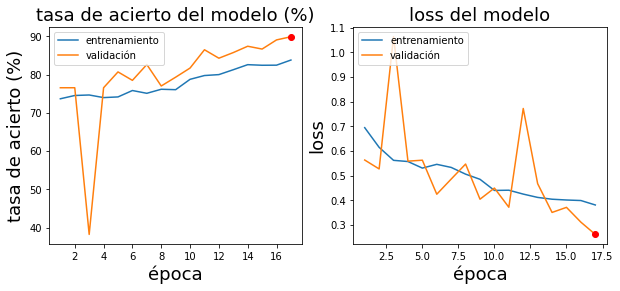

23/71 [========>.....................] - ETA: 8:52 - loss: 0.3322 - accuracy: 0.8533

KeyboardInterrupt: ignored

In [79]:
epochs = 50

modelpath="model_current_best_parte3.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit(train_generator, 
                        steps_per_epoch=number_train_samples // batch_size,
                        epochs=1,
                        callbacks=callbacks_list,
                        verbose=1,
                        shuffle = False,
                        validation_data=validation_generator,
                        validation_steps=number_val_samples // batch_size
                       )
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [80]:
model = load_model(modelpath)

In [81]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

scores_te = model.evaluate(test_generator)
print('Test loss     :', scores_te[0])
print('Test accuracy :', scores_te[1])

72/72 [==============================] - 195s 3s/step - loss: 0.2915 - accuracy: 0.8764
Train loss    : 0.2914985716342926
Train accuracy: 0.8763946890830994

18/18 [==============================] - 44s 2s/step - loss: 0.2605 - accuracy: 0.9008
Val loss    : 0.26047688722610474
Val accuracy: 0.9007833003997803

90/90 [==============================] - 224s 2s/step - loss: 0.2591 - accuracy: 0.9009
Test loss     : 0.2590559124946594
Test accuracy : 0.900874137878418


In [82]:
y_real = test_generator.classes
y_pred_proba = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [83]:
y_pred_proba[:5]

array([[0.9811421 , 0.01885785],
       [0.97402394, 0.02597605],
       [0.7818571 , 0.21814294],
       [0.7577408 , 0.24225922],
       [0.28759125, 0.71240866]], dtype=float32)

In [84]:
test_generator.class_indices

{'bio': 0, 'obj': 1}

In [85]:
num2class = {test_generator.class_indices[x]:x  for x in test_generator.class_indices.keys()}
num2class

{0: 'bio', 1: 'obj'}

In [86]:
for clase in range(6):
    nombre_clase = num2class[clase]

    fpr, tpr, thresholds = roc_curve(y_real==clase, y_pred_proba[:,clase])
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()

ValueError: ignored

In [87]:
test_datagen2 = ImageDataGenerator(dtype='float32')

test_generator2 = test_datagen2.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n,
    shuffle=False,
    class_mode='sparse')

Found 1144 images belonging to 2 classes.


In [88]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [89]:
def show_probs(probs):
    cadena = ""
    for i in range(len(num2class)):
        cadena = cadena + "{}: {}% ".format(num2class[i], int(100*probs[i]))
    print(cadena)

Clase real: bio


ValueError: ignored

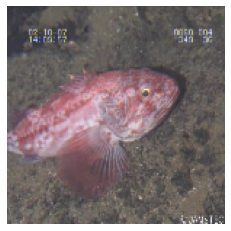

In [96]:
'''
ind_te1 = 1020 # 145

image = X_te[ind_te1].copy()

print("Clase real:", num2class[y_te[ind_te1]])
plt.imshow(image/255, cmap='jet')
plt.axis("off")
p = model.predict(preprocesado(np.array([image])))[0]

show_probs(p)
'''

ind_te1 = 140

image = X_te[ind_te1].copy()

print("Clase real:", num2class[y_te[ind_te1]])
plt.imshow(image/255, cmap='jet')
plt.axis("off")
p = model.predict(preprocesado(np.array([image])))[0]
cadena = ""
for i in range(len(num2class)):
    cadena = cadena + "{}: {}% ".format(num2class[i], int(100*p[i]))
print(cadena)

In [97]:
test_data_dir

'test'

In [98]:
# primero cargo a memoria los ejemplos de test:

test_datagen2 = ImageDataGenerator(dtype='float32',
                                   preprocessing_function = preprocesado)

test_generator2 = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n, # todas las imágenes del directorio test
    shuffle=False,
    class_mode='sparse') # binary: 0/1. Sparse: entero a partir de 0. Categorical: one hot

Found 1144 images belonging to 2 classes.


In [99]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [100]:
import tensorflow as tf
import cv2

def find_ind_last_conv2D(model):
    ind_last_conv2D_layer = None
    for i,x in enumerate(model.layers):
        if x.__class__.__name__ == "Conv2D":
            ind_last_conv2D_layer = i
    return ind_last_conv2D_layer


def show_heatmap(model, im):
    # im: imagen preprocesada por resnet ()
    # ver función _preprocess_numpy_input de
    # https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py

    # creo una versión de la imagen des preprocesada
    im2 = im.copy()
    im2[:,:,0] = im2[:,:,0] + 103.939
    im2[:,:,1] = im2[:,:,1] + 116.779
    im2[:,:,2] = im2[:,:,2] + 123.68
    im2 = im2 / 255
    im2 = im2[:,:,::-1]

    imag = np.expand_dims(im, axis=0) # de 1 imagen pasamos a 1 conjunto de 1 imagen
    probs = model.predict(imag)[0]
        
    # The is the output feature map of the last convolutional layer
    last_conv_layer = model.layers[find_ind_last_conv2D(model)]
    
    # This is the gradient of the "benign" class with regard to
    # the output feature map of last convolutional layer
    with tf.GradientTape() as tape:
        aux = model.output
        #aux = model.layers[-2].output # salida de la última capa densa antes de softmax

        iterate = tf.keras.models.Model([model.inputs], [aux, last_conv_layer.output])
        model_out, last_conv_layer = iterate(imag)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)

        # mean intensity of the gradient over a specific feature map channel:
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)    
    heatmap = np.maximum(heatmap, 0) # se quitan los negativos (se ponen a 0)
    heatmap /= np.max(heatmap) # se normaliza entre 0 y 1
    heatmap = heatmap[0] # pasamos de 1 conjunto de 1 heatmap a 1 heatmap
    
    # We use cv2 to load the original image
    #img = cv2.imread(img_path)
    img = imag[0]
    
    img = np.zeros((im.shape[0],im.shape[1],3))
#    print(im.shape, imag.shape)
    for i in range(3):
        img[:,:,i] = imag[0,:,:,0]

    
    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    
    # We apply the heatmap to the original image
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) / 255
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_BONE) / 255
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT) / 255
    
    
    # 0.4 here is a heatmap intensity factor
    
    #superimposed_img = heatmap * 0.5 + 0.5*im

    superimposed_img = heatmap * 0.5 + 0.5*im2

    #print(heatmap.min(), heatmap.max(), heatmap.mean(), heatmap.std())
    #print(img.min(), img.max(), img.mean(), img.std())
    #print(superimposed_img.min(),  superimposed_img.max(),
    #      superimposed_img.mean(), superimposed_img.std())
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    #plt.imshow(im, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])

    plt.imshow(im2, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])

    plt.subplot(1,3,2)
    plt.imshow(heatmap, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.subplot(1,3,3)
    plt.imshow(superimposed_img, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.show()
    show_probs(probs)
    #print(np.shape(imag))
    ##prob = 100*model.predict(imag)[0][class_indices["female"]]
    ##print("Probabilidad clase female: {:2.1f}%".format(prob))
    ##prob = 100*model.predict(imag)[0][class_indices["male"]]
    ##print("Probabilidad clase male  : {:2.1f}%".format(prob))
    ##print("\n\n")
    return heatmap, superimposed_img

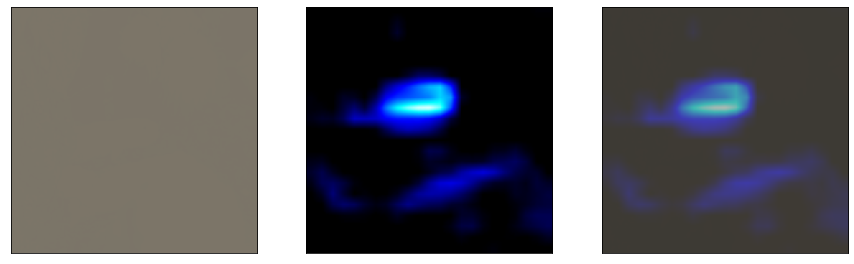

bio: 96% obj: 3% 
Real class: bio





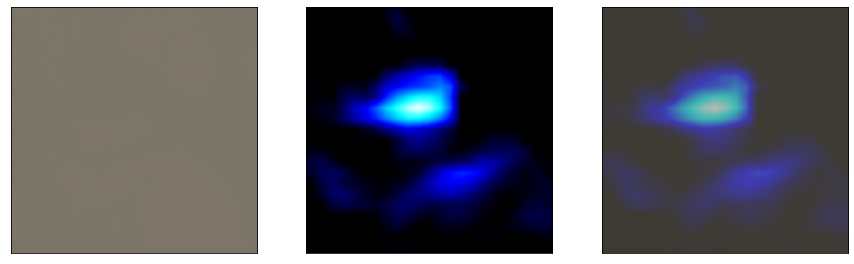

bio: 98% obj: 1% 
Real class: bio





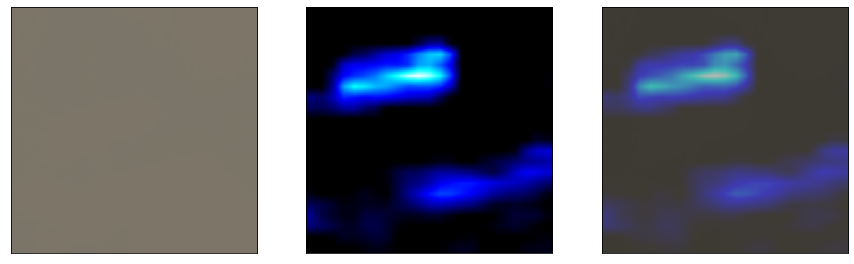

bio: 99% obj: 0% 
Real class: bio





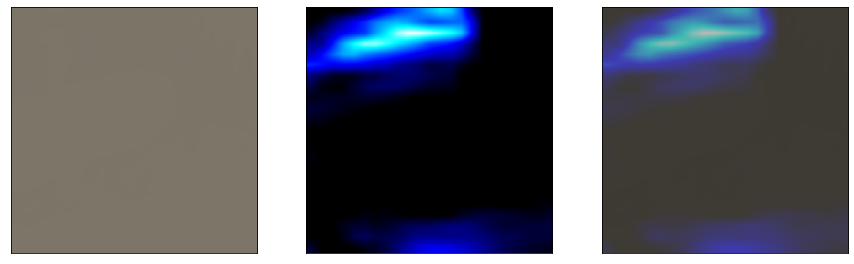

bio: 99% obj: 0% 
Real class: bio





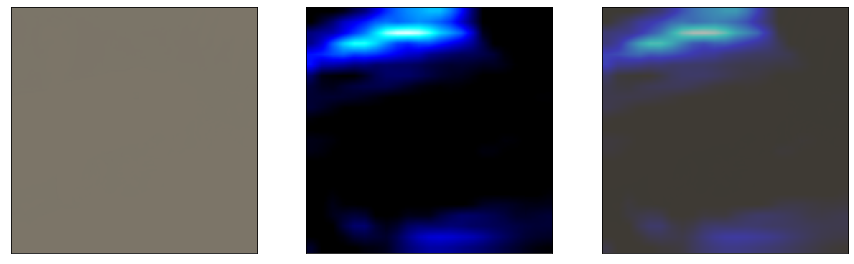

bio: 99% obj: 0% 
Real class: bio





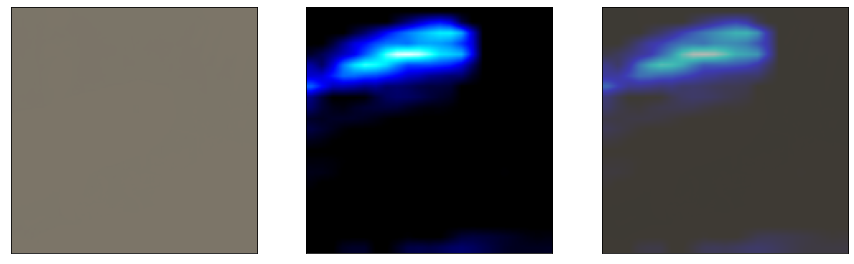

bio: 99% obj: 0% 
Real class: bio





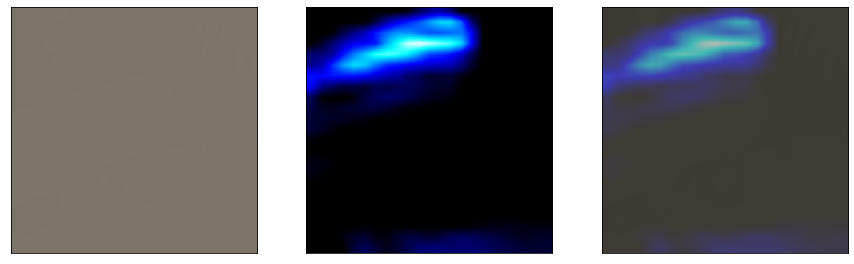

bio: 99% obj: 0% 
Real class: bio





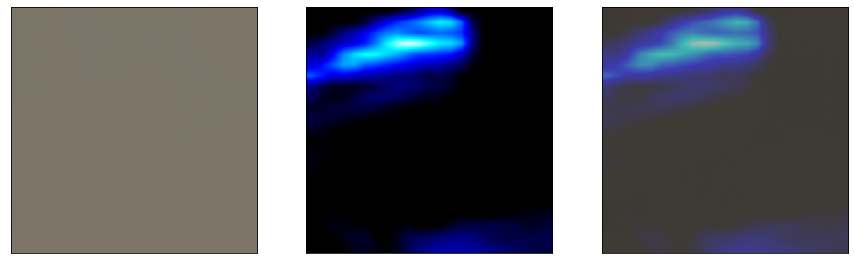

bio: 99% obj: 0% 
Real class: bio





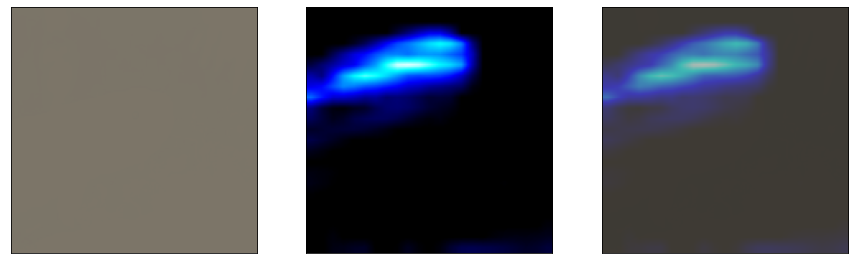

bio: 99% obj: 0% 
Real class: bio





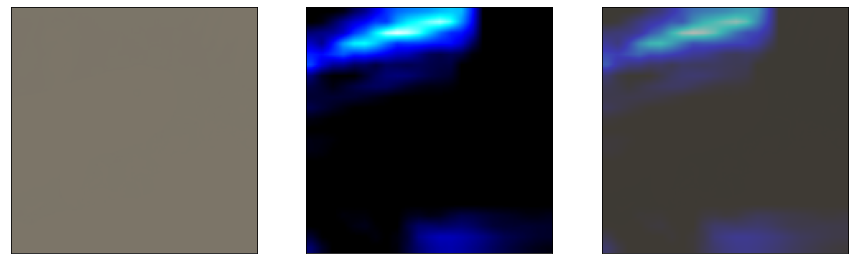

bio: 99% obj: 0% 
Real class: bio





In [101]:
ind = 1041 
ind = 200

for i in range(ind, ind+10):
    show_heatmap(model, X_te[i])
    print("Real class:", num2class[y_te[i]])
    print("\n\n")

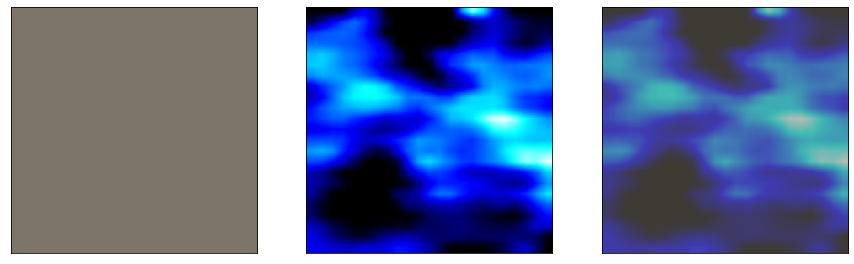

bio: 34% obj: 65% 
Real class: bio





In [102]:
show_heatmap(model, X_te[100])
print("Real class:", num2class[y_te[100]])
print("\n\n")

In [ ]:
ind_te1 = 150

image = X_te[ind_te1].copy()

plt.imshow(image, cmap='jet')
plt.axis("off")
p = model.predict(np.expand_dims(image, axis=0))[0][class_indices["female"]]
print("Probabilidad female: {:2.1f}%".format(100*p))
p = model.predict(np.expand_dims(image, axis=0))[0][class_indices["male"]]
print("Probabilidad male  : {:2.1f}%".format(100*p))

In [ ]:
y_pred_proba = model.predict(X_te)